In [ ]:
%pylab inline
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import re
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
import time

In [ ]:
import seaborn as sns

In [ ]:
def ht(df, n = 5):
    print(df.shape)
    if len(df) <= 2*n:
        display(df)
    else:
        display(df.head(n).append(df.tail(n)))

In [473]:
pd.set_option('display.max_columns', 100)
def pf(df):
    pd.set_option('display.max_rows', len(df))
    display(df)
    pd.reset_option('display.max_rows')

In [395]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('ggplot')

In [ ]:
import mlrose

In [759]:
random_seed_list = [199, 197, 193, 191, 181, 179, 173, 167, 163, 157]

## Part1

In [940]:
def RHC_HP(restarts, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, 157]):
    best_fitness_list = []
    wall_clock_time_list = []    
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(
            problem, 
            max_attempts=eval(max_attempts), 
            max_iters=5000, 
            restarts=eval(restarts), 
            init_state=init_state, 
            curve=True, 
            random_state=random_seed_list[i]
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'restarts={restarts}, max_attempts={max_attempts}'
        df['RO'] = 'RHC'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list

def SA_HP(init_temp, exp_const, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, 157]):
    best_fitness_list = []
    wall_clock_time_list = []    
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(
            problem, 
            schedule = mlrose.ExpDecay(init_temp = eval(init_temp), exp_const=eval(exp_const), min_temp=1e-10),
            max_attempts = eval(max_attempts), 
            max_iters = 5000,
            init_state = init_state, 
            random_state = random_seed_list[i], 
            curve = True
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'T={init_temp},r={exp_const},max_attempts={max_attempts}'
        df['RO'] = 'SA'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list

def GA_HP(pop_size, mut_prob, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, 157]):
    best_fitness_list = []
    wall_clock_time_list = []
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.genetic_alg(
            problem, 
            pop_size = eval(pop_size),
            mutation_prob=eval(mut_prob), 
            max_attempts=eval(max_attempts), 
            max_iters=5000, 
            random_state = random_seed_list[i], 
            curve = True
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'pop_size={pop_size},mut_prob={mut_prob},max_attempts={max_attempts}'
        df['RO'] = 'GA'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list        

def MIMIC_HP(pop_size, keep_pct, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, 157], fast_mimic=True):
    best_fitness_list = []
    wall_clock_time_list = []
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.mimic(
            problem, 
            pop_size=eval(pop_size), 
            keep_pct=eval(keep_pct), 
            max_attempts=eval(max_attempts), 
            max_iters=5000, 
            curve=True, 
            random_state=random_seed_list[i], 
            fast_mimic=fast_mimic
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'pop_size={pop_size},keep_pct={keep_pct},max_attempts={max_attempts}'
        df['RO'] = 'MIMIC'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list

### ContinuousPeaks

In [410]:
N = 80

In [411]:
fitness = mlrose.ContinuousPeaks()

In [412]:
np.random.seed(random_seed_list[-1])
init_state = np.random.randint(low = 0, high = 2, size = N)

In [413]:
problem = mlrose.DiscreteOpt(length = N, fitness_fn = fitness, maximize = True, max_val = 2)

#### RHC

In [747]:
df_fitness_curve_list = []

In [748]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

438.2
0.018779277801513672


In [749]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='100', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

608.2
0.4058809995651245


In [750]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='400', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

635.2
0.871970272064209


In [751]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='800', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

638.8
1.166579580307007


In [752]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='1200', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

640.8
1.4258191108703613


In [753]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='1600', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

641.0
1.440826940536499


In [754]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='2000', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

641.0
1.4720967769622804


In [755]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(224635, 6)


,fitness,iter,try,hyper,RO,N
0,419.0,0,0,"restarts=0, max_attempts=10",RHC,800
1,419.0,1,0,"restarts=0, max_attempts=10",RHC,800
2,419.0,2,0,"restarts=0, max_attempts=10",RHC,800
3,419.0,3,0,"restarts=0, max_attempts=10",RHC,800
4,419.0,4,0,"restarts=0, max_attempts=10",RHC,800
4995,639.0,4995,9,"restarts=0, max_attempts=2000",RHC,800
4996,639.0,4996,9,"restarts=0, max_attempts=2000",RHC,800
4997,639.0,4997,9,"restarts=0, max_attempts=2000",RHC,800
4998,639.0,4998,9,"restarts=0, max_attempts=2000",RHC,800
4999,639.0,4999,9,"restarts=0, max_attempts=2000",RHC,800


Text(0.5, 1.0, 'ContinuousPeaks RHC HP tuning')

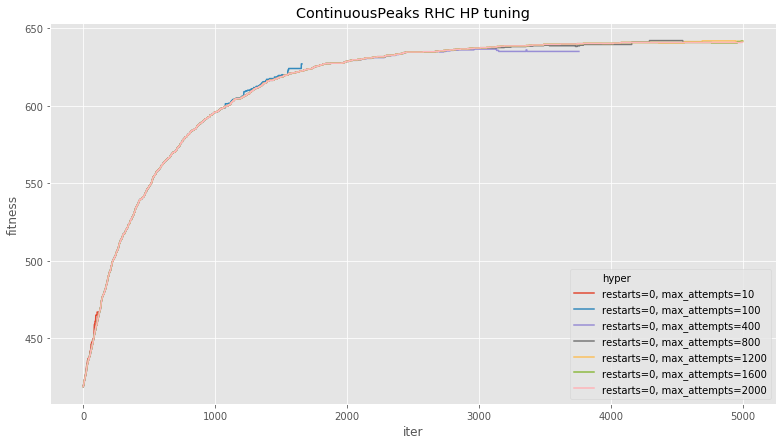

In [756]:
sns.lineplot(data=df_fitness_curve, x="iter", y="fitness", hue="hyper", ci=None).set_title('ContinuousPeaks RHC HP tuning')

#### SA

In [429]:
df_fitness_curve_list = []

In [431]:
# T=1e1,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e1', exp_const='0.005', max_attempts='10', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

113.2
0.13833892345428467


In [432]:
# T=1e1,r=0.005,max_attempts=100
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e1', exp_const='0.005', max_attempts='100', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

148.6
0.27576627731323244


In [433]:
# T=1e1,r=0.005,max_attempts=500
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e1', exp_const='0.005', max_attempts='500', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

149.6
0.31565830707550047


In [434]:
# T=1e3,r=0.005,max_attempts=500
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e3', exp_const='0.005', max_attempts='500', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

150.5
0.43049299716949463


In [435]:
# T=1e5,r=0.005,max_attempts=500
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e5', exp_const='0.005', max_attempts='500', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

143.0
0.4726791620254517


In [436]:
# T=1e3,r=0.01,max_attempts=500
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e3', exp_const='0.01', max_attempts='500', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

150.8
0.3277232885360718


In [437]:
# T=1e3,r=0.1,max_attempts=500
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e3', exp_const='0.1', max_attempts='500', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

136.8
0.23505423069000245


In [438]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(251972, 6)


,fitness,iter,try,hyper,RO,N
0,9.0,0,0,"T=1e1,r=0.005,max_attempts=10",SA,80
1,9.0,1,0,"T=1e1,r=0.005,max_attempts=10",SA,80
2,9.0,2,0,"T=1e1,r=0.005,max_attempts=10",SA,80
3,9.0,3,0,"T=1e1,r=0.005,max_attempts=10",SA,80
4,9.0,4,0,"T=1e1,r=0.005,max_attempts=10",SA,80
3693,151.0,3693,9,"T=1e3,r=0.1,max_attempts=500",SA,80
3694,151.0,3694,9,"T=1e3,r=0.1,max_attempts=500",SA,80
3695,151.0,3695,9,"T=1e3,r=0.1,max_attempts=500",SA,80
3696,151.0,3696,9,"T=1e3,r=0.1,max_attempts=500",SA,80
3697,151.0,3697,9,"T=1e3,r=0.1,max_attempts=500",SA,80


Text(0.5, 1.0, 'ContinuousPeaks SA HP tuning')

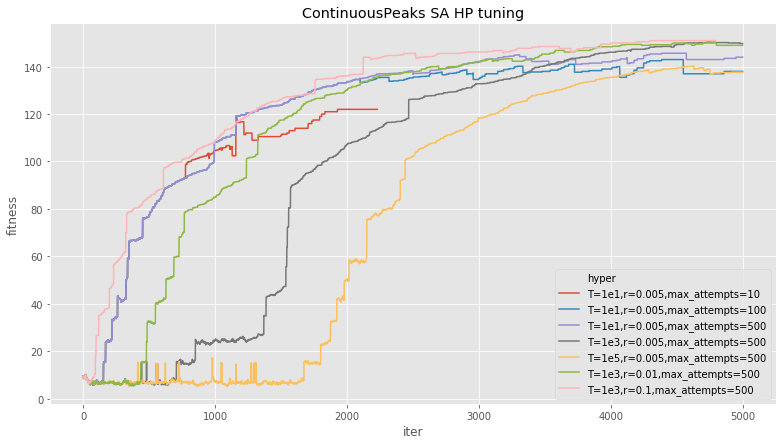

In [439]:
sns.lineplot(data=df_fitness_curve, x="iter", y="fitness", hue="hyper", ci=None).set_title('ContinuousPeaks SA HP tuning')

#### GA

In [440]:
df_fitness_curve_list = []

In [442]:
# pop_size=200,mut_prob=0.1,max_attempts=10
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.1', max_attempts='10', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

102.4
0.7032148599624634


In [443]:
# pop_size=200,mut_prob=0.1,max_attempts=100
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.1', max_attempts='100', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

106.0
3.9959545135498047


In [444]:
# pop_size=100,mut_prob=0.1,max_attempts=100
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='100', mut_prob='0.1', max_attempts='100', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

104.3
2.0314271450042725


In [445]:
# pop_size=400,mut_prob=0.1,max_attempts=100
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.1', max_attempts='100', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

106.1
8.894734573364257


In [446]:
# pop_size=200,mut_prob=0.2,max_attempts=100
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.2', max_attempts='100', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

98.7
3.797126579284668


In [447]:
# pop_size=200,mut_prob=0.05,max_attempts=100
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.05', max_attempts='100', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

109.6
4.673341989517212


In [448]:
# pop_size=200,mut_prob=0.01,max_attempts=100
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.01', max_attempts='100', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

115.1
5.248519468307495


In [449]:
# pop_size=200,mut_prob=0.005,max_attempts=100
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.005', max_attempts='100', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

111.7
4.819429659843445


In [450]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(13114, 6)


,fitness,iter,try,hyper,RO,N
0,14.0,0,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,80
1,15.0,1,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,80
2,93.0,2,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,80
3,93.0,3,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,80
4,94.0,4,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,80
247,115.0,247,9,"pop_size=200,mut_prob=0.005,max_attempts=100",GA,80
248,115.0,248,9,"pop_size=200,mut_prob=0.005,max_attempts=100",GA,80
249,115.0,249,9,"pop_size=200,mut_prob=0.005,max_attempts=100",GA,80
250,115.0,250,9,"pop_size=200,mut_prob=0.005,max_attempts=100",GA,80
251,115.0,251,9,"pop_size=200,mut_prob=0.005,max_attempts=100",GA,80


Text(0.5, 1.0, 'ContinuousPeaks GA HP tuning')

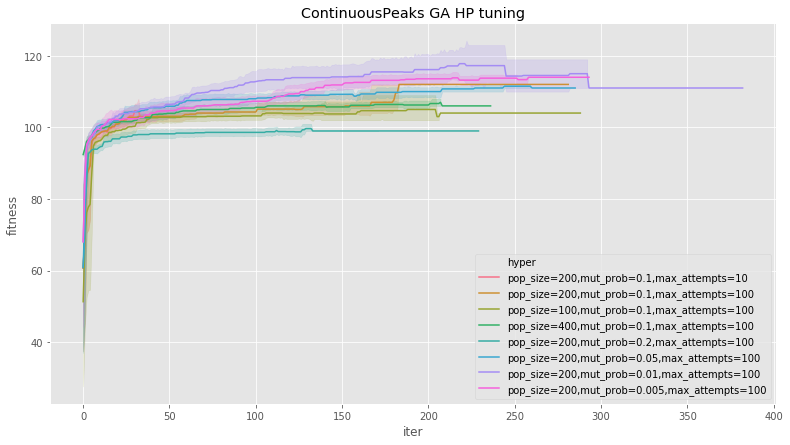

In [451]:
sns.lineplot(data=df_fitness_curve, x="iter", y="fitness", hue="hyper").set_title('ContinuousPeaks GA HP tuning')

#### MIMIC

In [452]:
df_fitness_curve_list = []

In [454]:
# pop_size=200,keep_pct=0.2,max_attempts=10
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.2', max_attempts='10', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

113.8
1.1311482906341552


In [455]:
# pop_size=200,keep_pct=0.2,max_attempts=100
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.2', max_attempts='100', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

114.0
6.239382314682007


In [456]:
# pop_size=200,keep_pct=0.1,max_attempts=10
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.1', max_attempts='10', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

116.5
0.9866622924804688


In [457]:
# pop_size=200,keep_pct=0.3,max_attempts=10
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.3', max_attempts='10', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

124.0
1.5566158533096313


In [458]:
# pop_size=200,keep_pct=0.5,max_attempts=10
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.5', max_attempts='10', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

116.4
1.9959105730056763


In [459]:
# pop_size=400,keep_pct=0.3,max_attempts=10
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='400', keep_pct='0.3', max_attempts='10', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

128.7
3.163662481307983


In [460]:
# pop_size=600,keep_pct=0.3,max_attempts=10
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='600', keep_pct='0.3', max_attempts='10', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

132.9
4.464499878883362


In [461]:
# pop_size=800,keep_pct=0.3,max_attempts=10
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='800', keep_pct='0.3', max_attempts='10', N=80)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

126.2
5.1200932264328


In [462]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(3706, 6)


,fitness,iter,try,hyper,RO,N
0,12.0,0,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,80
1,15.0,1,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,80
2,90.0,2,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,80
3,91.0,3,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,80
4,93.0,4,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,80
36,112.0,36,9,"pop_size=800,keep_pct=0.3,max_attempts=10",MIMIC,80
37,112.0,37,9,"pop_size=800,keep_pct=0.3,max_attempts=10",MIMIC,80
38,112.0,38,9,"pop_size=800,keep_pct=0.3,max_attempts=10",MIMIC,80
39,112.0,39,9,"pop_size=800,keep_pct=0.3,max_attempts=10",MIMIC,80
40,112.0,40,9,"pop_size=800,keep_pct=0.3,max_attempts=10",MIMIC,80


Text(0.5, 1.0, 'ContinuousPeaks MIMIC HP tuning')

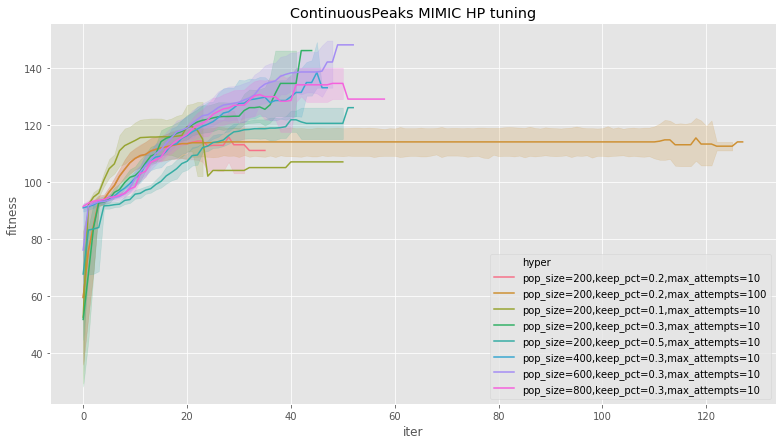

In [463]:
sns.lineplot(data=df_fitness_curve, x="iter", y="fitness", hue="hyper").set_title('ContinuousPeaks MIMIC HP tuning')

#### Problem Size

In [491]:
df_fitness_curve_list = []
df_result_list = []

In [492]:
fitness = mlrose.ContinuousPeaks()

In [493]:
for N in [40, 60, 80, 100]:
    print('N', N)
    np.random.seed(random_seed_list[-1])
    init_state = np.random.randint(low = 0, high = 2, size = N)
    problem = mlrose.DiscreteOpt(length = N, fitness_fn = fitness, maximize = True, max_val = 2)
    
    print('RHC')
    best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='500', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)    
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'RHC', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='RHC')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('SA')
    best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e3', exp_const='0.01', max_attempts='500', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'SA', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='SA')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('GA')
    best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.01', max_attempts='100', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'GA', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='GA')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('MIMIC')
    best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='600', keep_pct='0.3', max_attempts='10', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'MIMIC', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='MIMIC')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))

N 40
RHC
40.0
0.037827157974243165
SA
75.0
0.08641407489776612
GA
65.4
2.7993081331253054
MIMIC
67.2
1.1578090190887451
N 60
RHC
60.0
0.05905282497406006
SA
113.0
0.1875403881072998
GA
89.5
3.575456213951111
MIMIC
92.2
2.1803719997406006
N 80
RHC
80.0
0.1404402494430542
SA
150.8
0.32644193172454833
GA
115.1
4.983419394493103
MIMIC
132.9
4.374228811264038
N 100
RHC
129.0
0.20629940032958985
SA
165.5
0.4246732234954834
GA
136.8
5.988725781440735
MIMIC
160.6
6.498143911361694


In [494]:
df_result = pd.concat(df_result_list)
pf(df_result)

,RO,N,best_fitness,wall_clock_time,max_iter
N,RHC,40,40.0,0.037827,923.2
N,SA,40,75.0,0.086414,1760.8
N,GA,40,65.4,2.799308,166.2
N,MIMIC,40,67.2,1.157809,27.8
N,RHC,60,60.0,0.059053,1283.8
N,SA,60,113.0,0.187540,2744.5
N,GA,60,89.5,3.575456,187.3
N,MIMIC,60,92.2,2.180372,32.2
N,RHC,80,80.0,0.140440,2185.6
N,SA,80,150.8,0.326442,3983.2


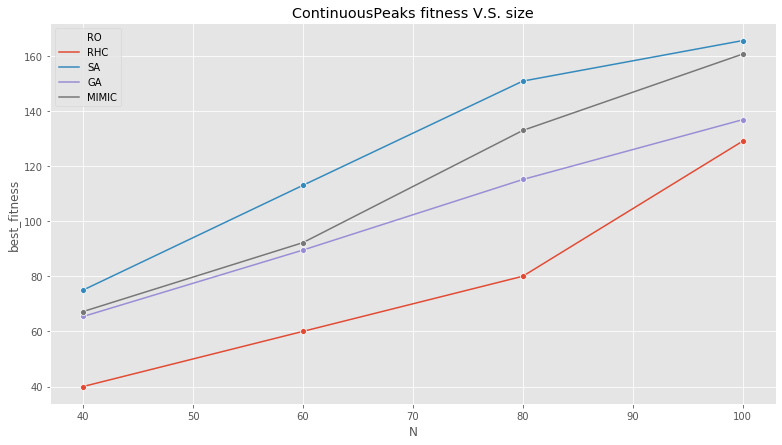

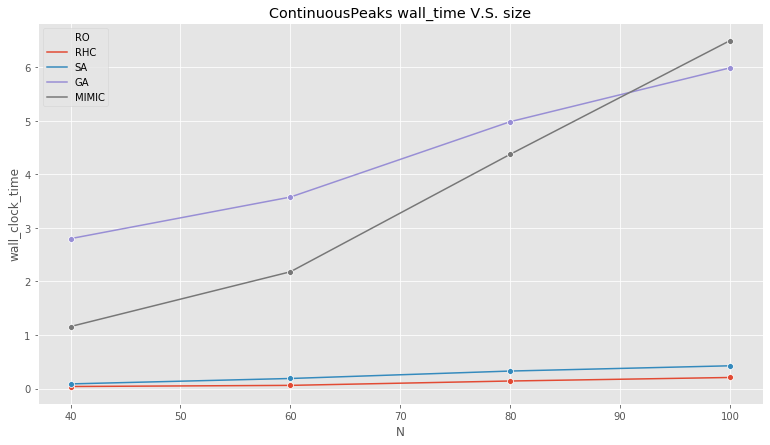

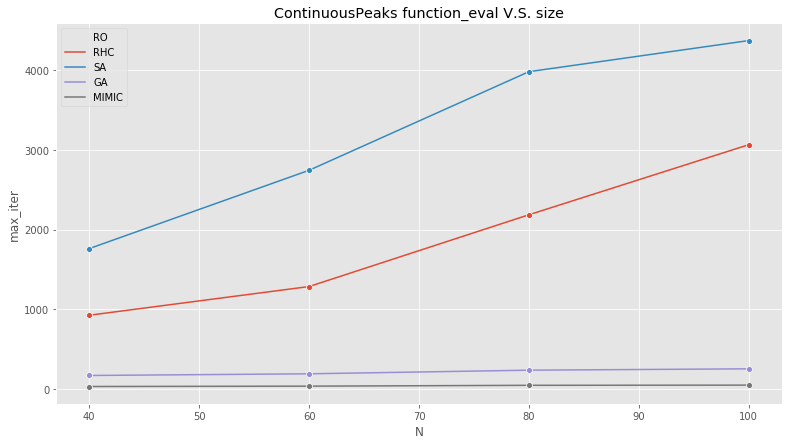

In [495]:
sns.lineplot(data=df_result, x="N", y="best_fitness", hue="RO", marker='o').set_title('ContinuousPeaks fitness V.S. size');
plt.show();
sns.lineplot(data=df_result, x="N", y="wall_clock_time", hue="RO", marker='o').set_title('ContinuousPeaks wall_time V.S. size');
plt.show();
sns.lineplot(data=df_result, x="N", y="max_iter", hue="RO", marker='o').set_title('ContinuousPeaks function_eval V.S. size');
plt.show();

In [496]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(213212, 6)


,fitness,iter,try,hyper,RO,N
0,9.0,0,0,"restarts=0, max_attempts=500",RHC,40
1,9.0,1,0,"restarts=0, max_attempts=500",RHC,40
2,9.0,2,0,"restarts=0, max_attempts=500",RHC,40
3,9.0,3,0,"restarts=0, max_attempts=500",RHC,40
4,9.0,4,0,"restarts=0, max_attempts=500",RHC,40
39,163.0,39,9,"pop_size=600,keep_pct=0.3,max_attempts=10",MIMIC,100
40,163.0,40,9,"pop_size=600,keep_pct=0.3,max_attempts=10",MIMIC,100
41,163.0,41,9,"pop_size=600,keep_pct=0.3,max_attempts=10",MIMIC,100
42,163.0,42,9,"pop_size=600,keep_pct=0.3,max_attempts=10",MIMIC,100
43,163.0,43,9,"pop_size=600,keep_pct=0.3,max_attempts=10",MIMIC,100


Text(0.5, 1.0, 'ContinuousPeaks 4 ROs N=80')

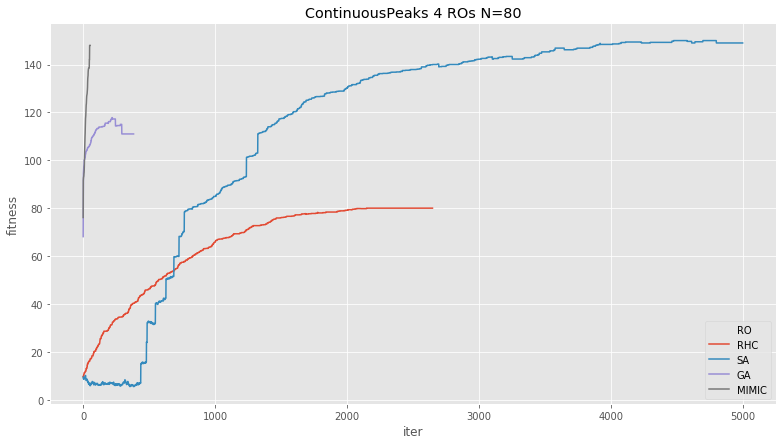

In [497]:
sns.lineplot(data=df_fitness_curve[df_fitness_curve['N']==80], x="iter", y="fitness", hue="RO", ci=None).set_title('ContinuousPeaks 4 ROs N=80')

### FlipFlop

In [736]:
N = 800

In [737]:
fitness = mlrose.FlipFlop()

In [738]:
np.random.seed(random_seed_list[-1])
init_state = np.random.randint(low = 0, high = 2, size = N)

In [740]:
fitness.evaluate(init_state)

419

In [739]:
problem = mlrose.DiscreteOpt(length = N, fitness_fn = fitness, maximize = True, max_val = 2)

#### RHC

In [779]:
df_fitness_curve_list = []

In [780]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

438.2
0.01893467903137207


In [781]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(518, 6)


,fitness,iter,try,hyper,RO,N
0,419.0,0,0,"restarts=0, max_attempts=10",RHC,800
1,419.0,1,0,"restarts=0, max_attempts=10",RHC,800
2,419.0,2,0,"restarts=0, max_attempts=10",RHC,800
3,419.0,3,0,"restarts=0, max_attempts=10",RHC,800
4,419.0,4,0,"restarts=0, max_attempts=10",RHC,800
16,425.0,16,9,"restarts=0, max_attempts=10",RHC,800
17,425.0,17,9,"restarts=0, max_attempts=10",RHC,800
18,425.0,18,9,"restarts=0, max_attempts=10",RHC,800
19,425.0,19,9,"restarts=0, max_attempts=10",RHC,800
20,425.0,20,9,"restarts=0, max_attempts=10",RHC,800


Text(0.5, 1.0, 'FlipFlop RHC HP tuning')

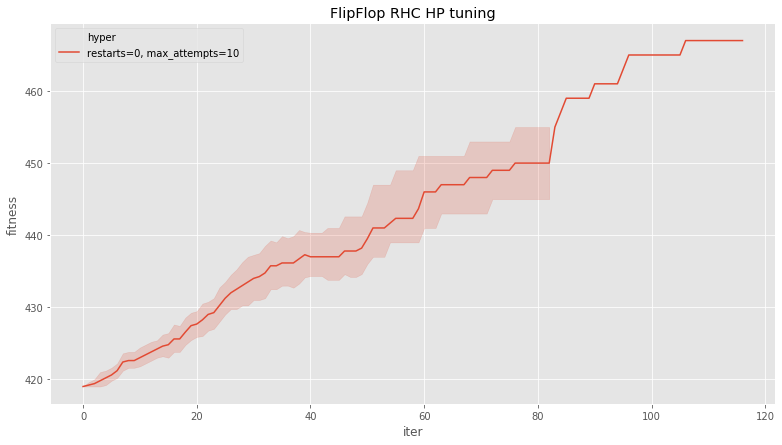

In [783]:
sns.lineplot(data=df_fitness_curve, x="iter", y="fitness", hue="hyper").set_title('FlipFlop RHC HP tuning')

#### SA

In [784]:
df_fitness_curve_list = []

In [785]:
# T=1e1,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e1', exp_const='0.005', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

629.4
0.6815076112747193


In [786]:
# T=1e1,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e2', exp_const='0.005', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

605.2
0.849310302734375


In [787]:
# T=1e1,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e2', exp_const='0.05', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

619.4
0.5651608467102051


In [788]:
# T=1e1,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e5', exp_const='0.005', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

612.3
1.7618754863739015


In [789]:
# T=1e1,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e2', exp_const='0.001', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

577.2
2.705647373199463


In [790]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(128035, 6)


,fitness,iter,try,hyper,RO,N
0,419.0,0,0,"T=1e1,r=0.005,max_attempts=10",SA,800
1,419.0,1,0,"T=1e1,r=0.005,max_attempts=10",SA,800
2,419.0,2,0,"T=1e1,r=0.005,max_attempts=10",SA,800
3,417.0,3,0,"T=1e1,r=0.005,max_attempts=10",SA,800
4,415.0,4,0,"T=1e1,r=0.005,max_attempts=10",SA,800
4995,589.0,4995,9,"T=1e2,r=0.001,max_attempts=10",SA,800
4996,591.0,4996,9,"T=1e2,r=0.001,max_attempts=10",SA,800
4997,591.0,4997,9,"T=1e2,r=0.001,max_attempts=10",SA,800
4998,591.0,4998,9,"T=1e2,r=0.001,max_attempts=10",SA,800
4999,591.0,4999,9,"T=1e2,r=0.001,max_attempts=10",SA,800


Text(0.5, 1.0, 'FlipFlop SA HP tuning')

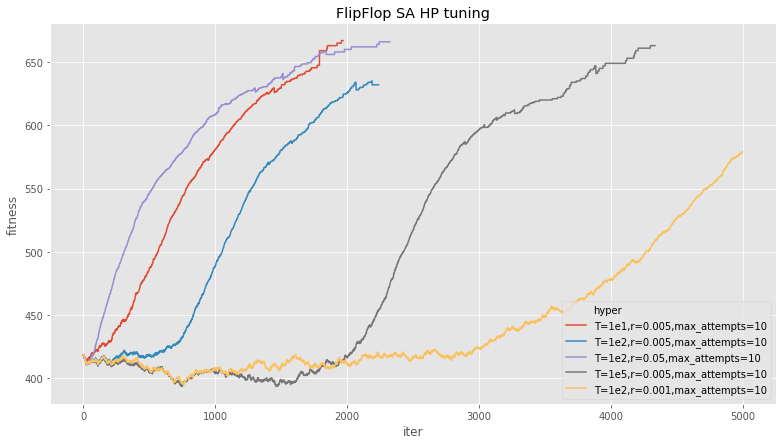

In [791]:
sns.lineplot(data=df_fitness_curve, x="iter", y="fitness", hue="hyper", ci=None).set_title('FlipFlop SA HP tuning')

#### MIMIC

In [757]:
df_fitness_curve_list = []

In [758]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.2', max_attempts='10', N=N, random_seed_list=[157])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

656.4
77.40889999866485


In [761]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.3', max_attempts='10', N=N, random_seed_list=[157])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

704.0
104.1303596496582


In [762]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.4', max_attempts='10', N=N, random_seed_list=[157])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

681.0
142.16240310668945


In [763]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='100', keep_pct='0.3', max_attempts='10', N=N, random_seed_list=[157])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

656.0
51.52159404754639


In [764]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='400', keep_pct='0.3', max_attempts='10', N=N, random_seed_list=[157])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

706.0
265.5029640197754


In [766]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(738, 6)


,fitness,iter,try,hyper,RO,N
0,440.0,0,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,800
1,440.0,1,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,800
2,442.0,2,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,800
3,442.0,3,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,800
4,450.0,4,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,800
69,706.0,69,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,800
70,706.0,70,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,800
71,706.0,71,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,800
72,706.0,72,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,800
73,706.0,73,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,800


Text(0.5, 1.0, 'FlipFlop MIMIC HP tuning')

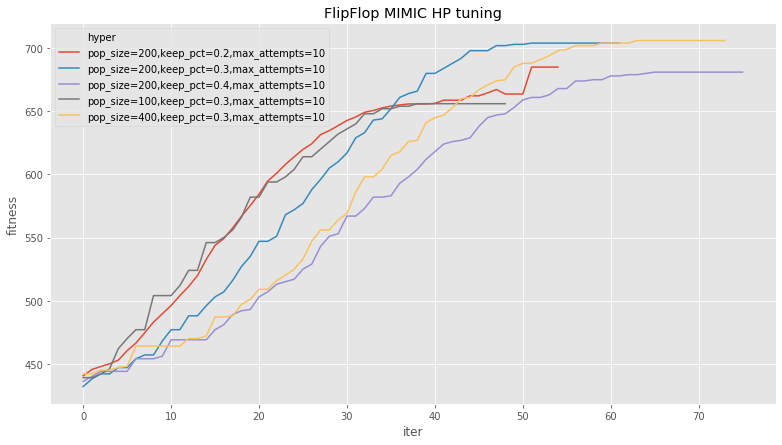

In [767]:
sns.lineplot(data=df_fitness_curve, x="iter", y="fitness", hue="hyper", ci=None).set_title('FlipFlop MIMIC HP tuning')

#### GA

In [768]:
df_fitness_curve_list = []

In [769]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.1', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

449.8
2.3237605333328246


In [770]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.1', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

451.9
3.3404917240142824


In [771]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.2', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

453.9
4.840701007843018


In [772]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.3', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

451.4
5.097918963432312


In [773]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(694, 6)


,fitness,iter,try,hyper,RO,N
0,434.0,0,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,800
1,434.0,1,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,800
2,434.0,2,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,800
3,434.0,3,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,800
4,435.0,4,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,800
6,445.0,6,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,800
7,445.0,7,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,800
8,445.0,8,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,800
9,445.0,9,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,800
10,445.0,10,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,800


Text(0.5, 1.0, 'FlipFlop GA HP tuning')

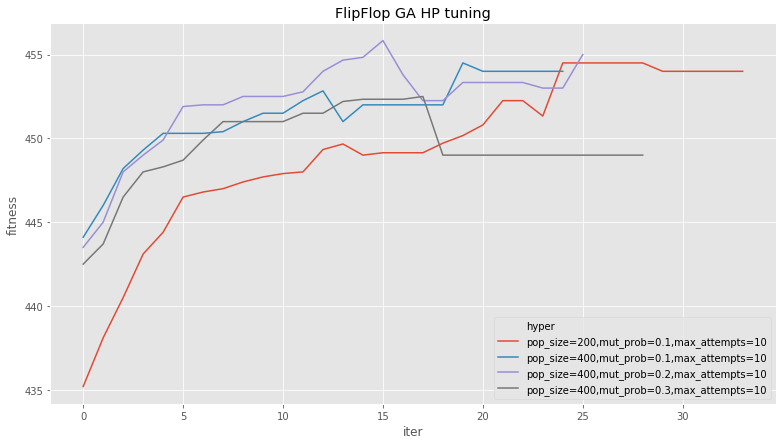

In [774]:
sns.lineplot(data=df_fitness_curve, x="iter", y="fitness", hue="hyper", ci=None).set_title('FlipFlop GA HP tuning')

#### Problem Size

In [1248]:
df_fitness_curve_list = []
df_result_list = []

In [796]:
fitness = mlrose.FlipFlop()

In [797]:
for N in [200, 400, 600, 800]:
    print('N', N)
    np.random.seed(random_seed_list[-1])
    init_state = np.random.randint(low = 0, high = 2, size = N)
    problem = mlrose.DiscreteOpt(length = N, fitness_fn = fitness, maximize = True, max_val = 2)
    
    print('RHC')
    best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='10', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)    
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'RHC', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='RHC')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('SA')
    best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e1', exp_const='0.005', max_attempts='10', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'SA', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='SA')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('GA')
    best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.2', max_attempts='10', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'GA', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='GA')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('MIMIC')
    best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='400', keep_pct='0.3', max_attempts='10', N=N, random_seed_list=[157])
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'MIMIC', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='MIMIC')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))

N 200
RHC
118.0
0.0043212175369262695
SA
164.9
0.09063241481781006
GA
126.3
1.3741779088974
MIMIC
179.0
10.904176235198975
N 400
RHC
220.0
0.00590982437133789
SA
311.2
0.2270035743713379
GA
236.0
2.698251962661743
MIMIC
347.0
40.481565952301025
N 600
RHC
331.0
0.01083829402923584
SA
471.6
0.4386147499084473
GA
345.2
3.504063844680786
MIMIC
531.0
115.48958897590637
N 800
RHC
438.2
0.01809542179107666
SA
629.4
0.6838451385498047
GA
453.9
4.7615714311599735
MIMIC
706.0
256.5274579524994


Text(0.5, 1.0, 'FlipFlop 4 ROs N=800')

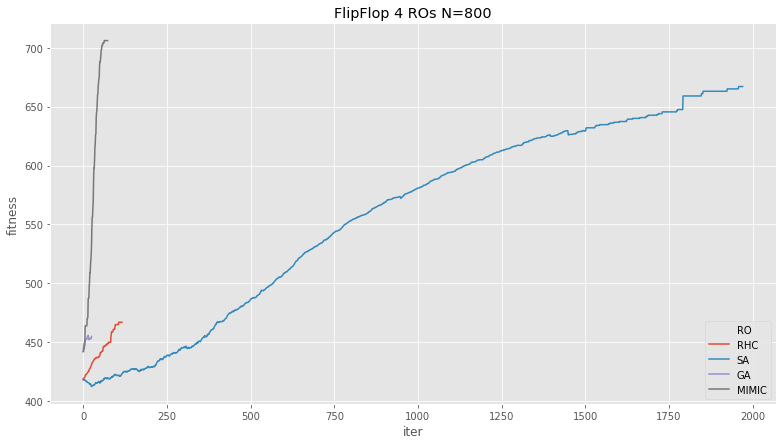

In [802]:
sns.lineplot(data=df_fitness_curve[df_fitness_curve['N']==800], x="iter", y="fitness", hue="RO", ci=None).set_title('FlipFlop 4 ROs N=800')

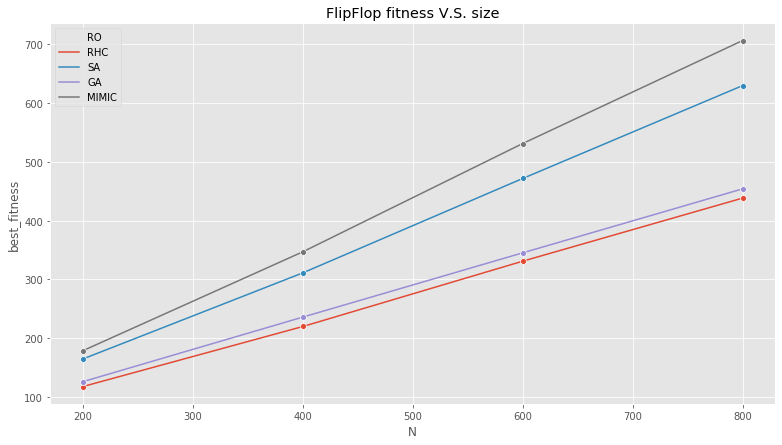

In [804]:
sns.lineplot(data=df_result, x="N", y="best_fitness", hue="RO", marker='o').set_title('FlipFlop fitness V.S. size');
plt.show();

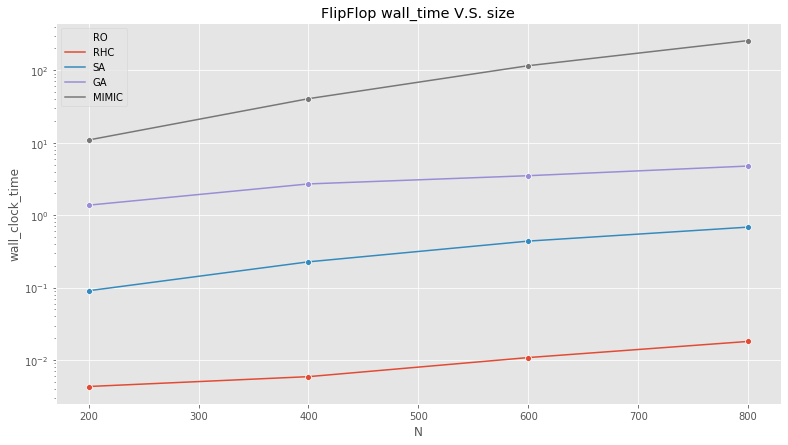

In [816]:
ax = sns.lineplot(data=df_result, x="N", y="wall_clock_time", hue="RO", marker='o')
ax.set(yscale='log')
ax.set_title('FlipFlop wall_time V.S. size')
plt.show();

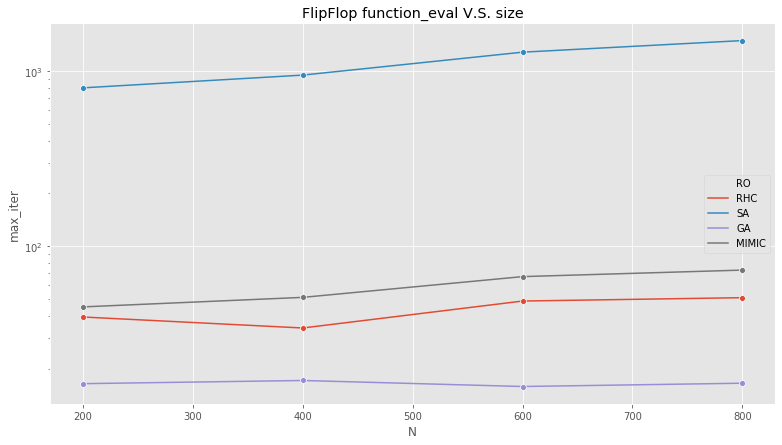

In [818]:
ax = sns.lineplot(data=df_result, x="N", y="max_iter", hue="RO", marker='o')
ax.set(yscale='log')
ax.set_title('FlipFlop function_eval V.S. size')
plt.show();

### TSP

In [1256]:
coords_list_base = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]
coords_list = [(p[0]+i*10,p[1]+i*10) for i in range(4) for p in coords_list_base]
N = len(coords_list)
fitness = mlrose.TravellingSales(coords = coords_list)

In [1257]:
np.random.seed(random_seed_list[-1])
init_state = np.random.permutation(N)

In [1258]:
fitness.evaluate(init_state)

751.4361673392298

In [1259]:
problem = mlrose.TSPOpt(length = N, fitness_fn = fitness, maximize=False)

#### GA

In [1176]:
df_fitness_curve_list = []

In [1177]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.1', max_attempts='10', N=N, random_seed_list=[random_seed_list[-1]])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

380.10351607452645
1.3879451751708984


In [1178]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.2', max_attempts='10', N=N, random_seed_list=[random_seed_list[-1]])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

378.3763950363592
2.536013603210449


In [1179]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='600', mut_prob='0.2', max_attempts='10', N=N, random_seed_list=[random_seed_list[-1]])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

371.99413603393964
3.9067749977111816


In [1180]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='600', mut_prob='0.3', max_attempts='10', N=N, random_seed_list=[random_seed_list[-1]])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

341.59206879909027
7.663537979125977


In [1181]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(74, 6)


,fitness,iter,try,hyper,RO,N
0,-415.777857,0,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,32
1,-415.777857,1,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,32
2,-380.103516,2,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,32
3,-380.103516,3,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,32
4,-380.103516,4,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,32
20,-341.592069,20,0,"pop_size=600,mut_prob=0.3,max_attempts=10",GA,32
21,-341.592069,21,0,"pop_size=600,mut_prob=0.3,max_attempts=10",GA,32
22,-341.592069,22,0,"pop_size=600,mut_prob=0.3,max_attempts=10",GA,32
23,-341.592069,23,0,"pop_size=600,mut_prob=0.3,max_attempts=10",GA,32
24,-341.592069,24,0,"pop_size=600,mut_prob=0.3,max_attempts=10",GA,32


Text(0.5, 1.0, 'TSP GA HP tuning')

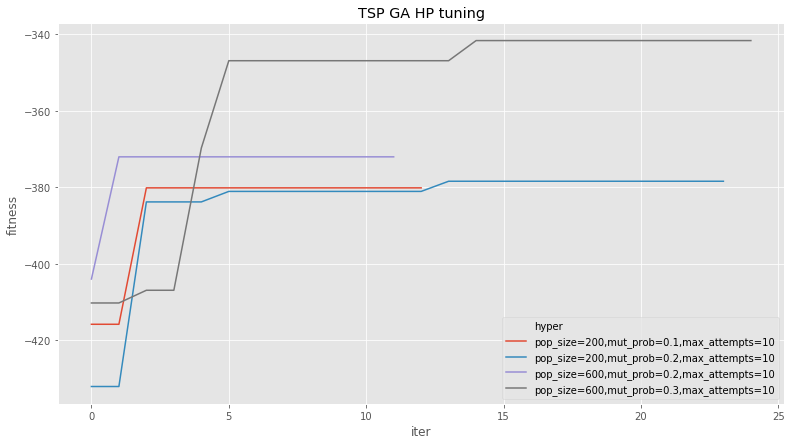

In [1182]:
sns.lineplot(data=df_fitness_curve, x="iter", y="fitness", hue="hyper", ci=None).set_title('TSP GA HP tuning')

#### MIMIC

In [1274]:
df_fitness_curve_list = []

In [1275]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='100', keep_pct='0.1', max_attempts='10', N=N, random_seed_list=[random_seed_list[-1]], fast_mimic=False)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

496.60192845650283
6.189061164855957


In [1276]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='300', keep_pct='0.05', max_attempts='10', N=N, random_seed_list=[random_seed_list[-1]], fast_mimic=False)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

412.80228690635244
9.648036003112793


In [1277]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.01', max_attempts='10', N=N, random_seed_list=[random_seed_list[-1]], fast_mimic=False)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

426.3006307922786
8.330344915390015


In [1278]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='150', keep_pct='0.1', max_attempts='10', N=N, random_seed_list=[random_seed_list[-1]], fast_mimic=False)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

431.03396761753635
6.747075796127319


In [1279]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(44, 6)


,fitness,iter,try,hyper,RO,N
0,-496.601928,0,0,"pop_size=100,keep_pct=0.1,max_attempts=10",MIMIC,32
1,-496.601928,1,0,"pop_size=100,keep_pct=0.1,max_attempts=10",MIMIC,32
2,-496.601928,2,0,"pop_size=100,keep_pct=0.1,max_attempts=10",MIMIC,32
3,-496.601928,3,0,"pop_size=100,keep_pct=0.1,max_attempts=10",MIMIC,32
4,-496.601928,4,0,"pop_size=100,keep_pct=0.1,max_attempts=10",MIMIC,32
6,-431.033968,6,0,"pop_size=150,keep_pct=0.1,max_attempts=10",MIMIC,32
7,-431.033968,7,0,"pop_size=150,keep_pct=0.1,max_attempts=10",MIMIC,32
8,-431.033968,8,0,"pop_size=150,keep_pct=0.1,max_attempts=10",MIMIC,32
9,-431.033968,9,0,"pop_size=150,keep_pct=0.1,max_attempts=10",MIMIC,32
10,-431.033968,10,0,"pop_size=150,keep_pct=0.1,max_attempts=10",MIMIC,32


Text(0.5, 1.0, 'TSP MIMIC HP tuning')

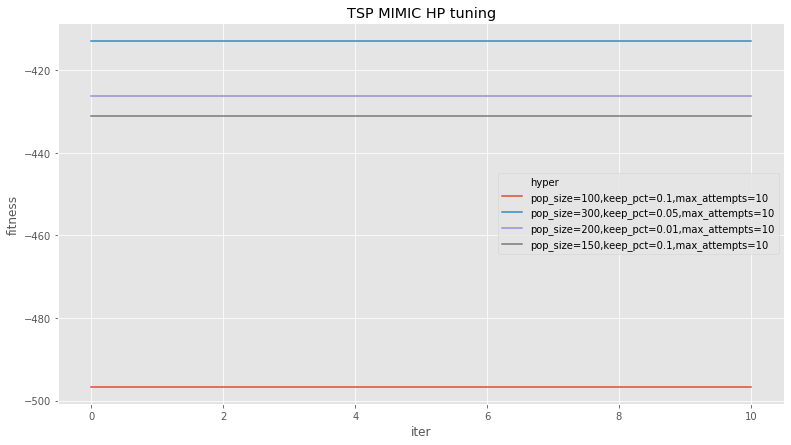

In [1280]:
sns.lineplot(data=df_fitness_curve, x="iter", y="fitness", hue="hyper", ci=None).set_title('TSP MIMIC HP tuning')

#### SA

In [1202]:
df_fitness_curve_list = []

In [1203]:
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e10', exp_const='0.999', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

433.3509947961221
0.03902738094329834


In [1204]:
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e10', exp_const='0.5', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

407.1033435381931
0.04648590087890625


In [1205]:
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e5', exp_const='0.999', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

364.3956576236511
0.034777259826660155


In [1206]:
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e5', exp_const='0.5', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

392.20484718014376
0.04111855030059815


In [1207]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(3080, 6)


,fitness,iter,try,hyper,RO,N
0,-723.075215,0,0,"T=1e10,r=0.999,max_attempts=10",SA,32
1,-717.060652,1,0,"T=1e10,r=0.999,max_attempts=10",SA,32
2,-717.070097,2,0,"T=1e10,r=0.999,max_attempts=10",SA,32
3,-798.152653,3,0,"T=1e10,r=0.999,max_attempts=10",SA,32
4,-798.155262,4,0,"T=1e10,r=0.999,max_attempts=10",SA,32
28,-488.924154,28,9,"T=1e5,r=0.5,max_attempts=10",SA,32
29,-488.924154,29,9,"T=1e5,r=0.5,max_attempts=10",SA,32
30,-488.924154,30,9,"T=1e5,r=0.5,max_attempts=10",SA,32
31,-488.924154,31,9,"T=1e5,r=0.5,max_attempts=10",SA,32
32,-488.924154,32,9,"T=1e5,r=0.5,max_attempts=10",SA,32


Text(0.5, 1.0, 'TSP SA HP tuning')

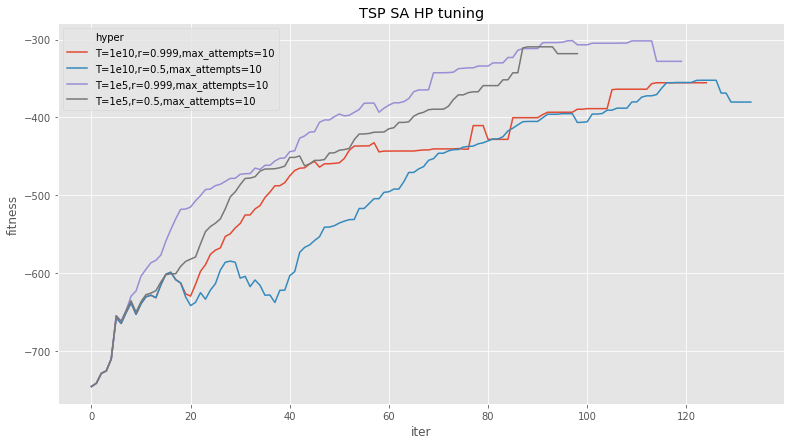

In [1208]:
sns.lineplot(data=df_fitness_curve, x="iter", y="fitness", hue="hyper", ci=None).set_title('TSP SA HP tuning')

#### RHC

In [1209]:
df_fitness_curve_list = []

In [1210]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

363.9871528541103
0.038478755950927736


In [1211]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(872, 6)


,fitness,iter,try,hyper,RO,N
0,-723.075215,0,0,"restarts=0, max_attempts=10",RHC,32
1,-717.060652,1,0,"restarts=0, max_attempts=10",RHC,32
2,-717.060652,2,0,"restarts=0, max_attempts=10",RHC,32
3,-711.705783,3,0,"restarts=0, max_attempts=10",RHC,32
4,-711.616358,4,0,"restarts=0, max_attempts=10",RHC,32
129,-336.412611,129,9,"restarts=0, max_attempts=10",RHC,32
130,-336.412611,130,9,"restarts=0, max_attempts=10",RHC,32
131,-336.412611,131,9,"restarts=0, max_attempts=10",RHC,32
132,-336.412611,132,9,"restarts=0, max_attempts=10",RHC,32
133,-336.412611,133,9,"restarts=0, max_attempts=10",RHC,32


Text(0.5, 1.0, 'TSP RHC HP tuning')

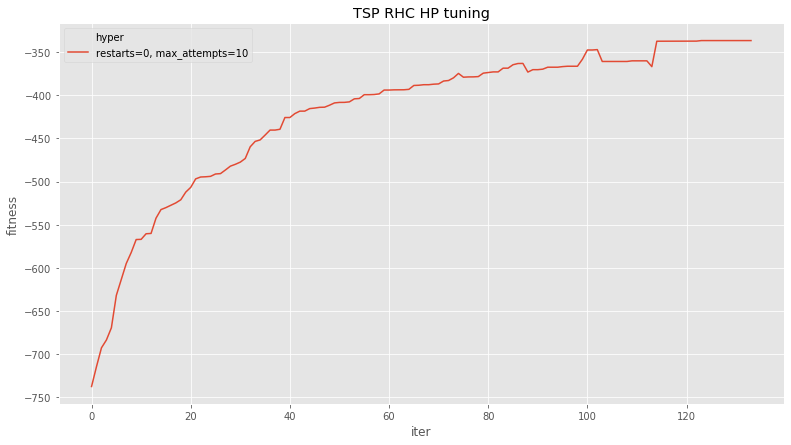

In [1212]:
sns.lineplot(data=df_fitness_curve, x="iter", y="fitness", hue="hyper", ci=None).set_title('TSP RHC HP tuning')

#### Problem Size

In [1281]:
df_fitness_curve_list = []
df_result_list = []

In [1282]:
# for N in [20, 40, 50, 80]:   
#     print('N', N)
#     np.random.seed(random_seed_list[-1])
#     coords_list = []
#     for i in range(N):
#         coords_list.append((np.random.rand(), np.random.rand()))
#     fitness = mlrose.TravellingSales(coords = coords_list)

for n in [1,2,3,4]:
# for n in [1,2,4,6]:
# for n in [3]:
    np.random.seed(random_seed_list[-1])
    coords_list_base = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]
    coords_list = [(p[0]+i*10,p[1]+i*10) for i in range(n) for p in coords_list_base]
    N = len(coords_list)
    fitness = mlrose.TravellingSales(coords = coords_list)    
    init_state = np.random.permutation(N)
    problem = mlrose.TSPOpt(length = N, fitness_fn = fitness, maximize=False)
    print('N', N)
    
    print('RHC')
    best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='10', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)    
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'RHC', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='RHC')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('SA')
    best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e5', exp_const='0.999', max_attempts='10', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'SA', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='SA')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('GA')
    best_fitness_list, wall_clock_time_list = GA_HP(pop_size='600', mut_prob='0.3', max_attempts='10', N=N, random_seed_list=[157])
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'GA', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='GA')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('MIMIC')
    best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='300', keep_pct='0.05', max_attempts='10', N=N, random_seed_list=[157], fast_mimic=False)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'MIMIC', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='MIMIC')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))

N 8
RHC
20.340041260890285
0.004335975646972657
SA
20.699932102123725
0.007443952560424805
GA
17.342617547667327
2.0553548336029053
MIMIC
18.89580466036301
1.6728630065917969
N 16
RHC
87.41817125370756
0.013309669494628907
SA
90.24433657396011
0.0165910005569458
GA
71.07368211071089
3.405519962310791
MIMIC
74.06621429167745
4.057126998901367
N 24
RHC
204.34437679571687
0.02329988479614258
SA
232.8194811807312
0.022057700157165527
GA
189.62335412039337
5.134459972381592
MIMIC
208.85425520358686
7.3176329135894775
N 32
RHC
363.9871528541103
0.041498780250549316
SA
364.3956576236511
0.028541946411132814
GA
341.59206879909027
8.212606191635132
MIMIC
412.80228690635244
9.770565271377563


Text(0.5, 1.0, 'TSP 4 ROs N=32')

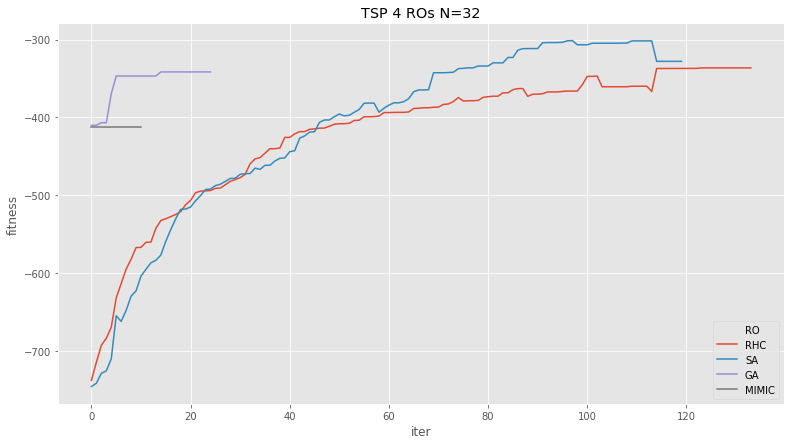

In [1288]:
sns.lineplot(data=df_fitness_curve[df_fitness_curve['N']==32], x="iter", y="fitness", hue="RO", ci=None).set_title('TSP 4 ROs N=32')

In [1291]:
df_result = pd.concat(df_result_list)
df_result['best_fitness'] = 1 / df_result['best_fitness']

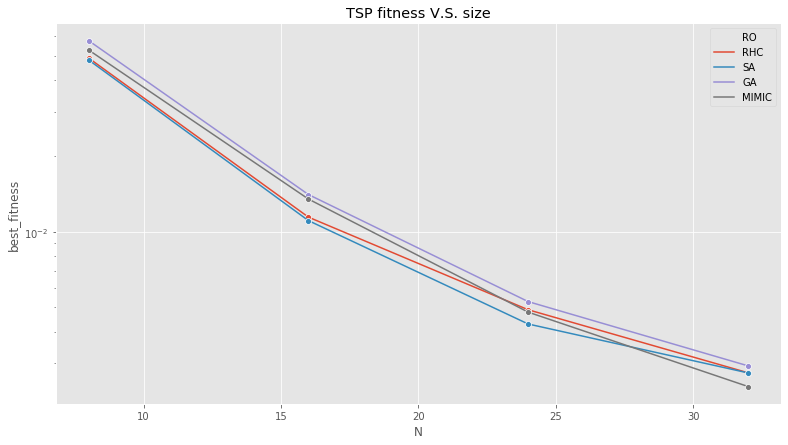

In [1292]:
ax = sns.lineplot(data=df_result, x="N", y="best_fitness", hue="RO", marker='o')
ax.set(yscale='log')
ax.set_title('TSP fitness V.S. size')
plt.show();

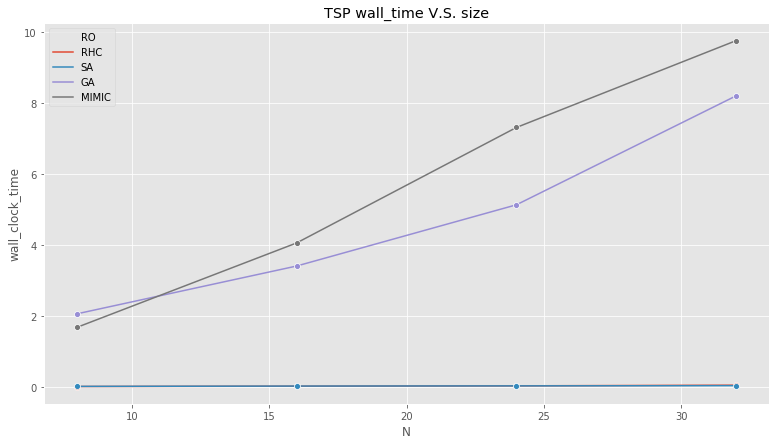

In [1293]:
ax = sns.lineplot(data=df_result, x="N", y="wall_clock_time", hue="RO", marker='o')
# ax.set(yscale='log')
ax.set_title('TSP wall_time V.S. size')
plt.show();

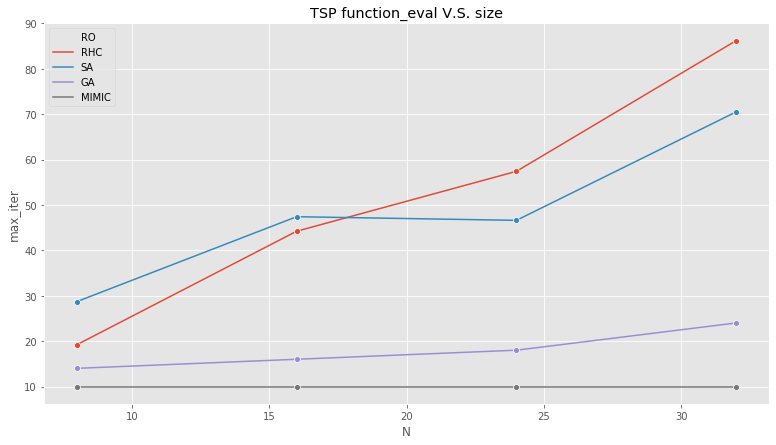

In [1294]:
ax = sns.lineplot(data=df_result, x="N", y="max_iter", hue="RO", marker='o')
# ax.set(yscale='log')
ax.set_title('TSP function_eval V.S. size')
plt.show();

### nQueens

In [1025]:
fitness = mlrose.Queens()

In [1026]:
N = 50

In [1027]:
problem = mlrose.DiscreteOpt(length = N, fitness_fn = fitness, maximize = False, max_val = N)

In [1028]:
np.random.seed(random_seed_list[-1])
init_state = np.random.permutation(N)

In [1029]:
fitness.evaluate(init_state)

27

#### GA

In [1032]:
df_fitness_curve_list = []

In [1033]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.1', max_attempts='10', N=N, random_seed_list=[random_seed_list[-1]])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

34.0
4.694279909133911


#### RHC

In [1034]:
df_fitness_curve_list = []

In [1035]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

24.5
0.04169697761535644
